<a href="https://colab.research.google.com/github/rovingmouse/english_entropy/blob/main/textEntropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import re
import string
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# get raw text from internet
book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

# extract just the text and have a look at it
text = book.text

text[:2000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [eBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV 

In [ ]:
strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 'ï»¿'
                 ]

for str2match in strings2replace:
  regexp = re.compile('%s'%str2match)
  text = regexp.sub(' ',text)

# regex_symbols2delete = re.compile('%s'%strings2replace)
# regex_symbols2delete.findall(text)

# text = regex_symbols2delete.sub(' ',text)

In [ ]:
text[:10000]

' The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding: UTF-8   *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks  

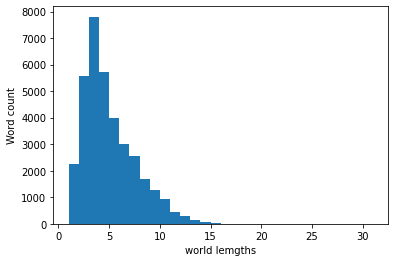

In [ ]:
words = text.split()

# print(len(words))
# words[:50]

wordlength = np.zeros(len(words))

for wordi in range(len(words)):
  wordlength[wordi] = len(words[wordi])

plt.hist(wordlength,bins=30)
plt.xlabel('world lengths')
plt.ylabel('Word count')
plt.show()

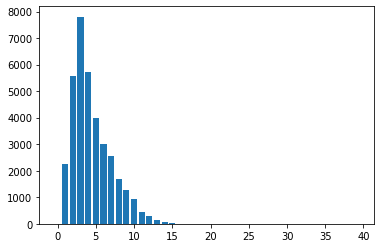

In [ ]:
# another alternative to the logic above
wordcounts = np.zeros(40)

for wrd in words:
  wordcounts[len(wrd)] += 1

plt.bar(range(len(wordcounts)),wordcounts)
plt.show()

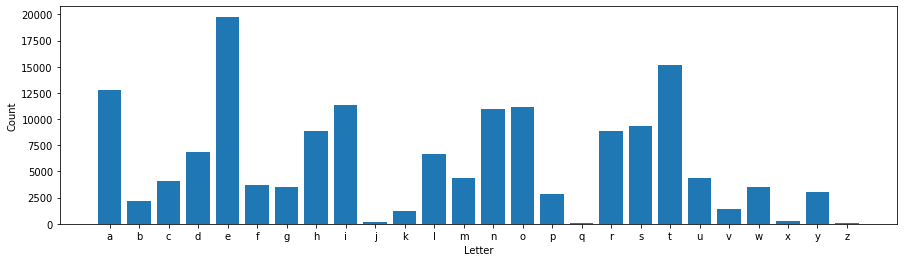

In [ ]:
letters = string.ascii_lowercase

lettercounts = np.zeros(len(letters))
n = 0

for i in letters:
  lettercounts[n] = text.lower().count(i)
  n += 1

fig,ax = plt.subplots(1,figsize=(15,4))
ax.bar(range(len(letters)),lettercounts)
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)
ax.set_xlabel('Letter')
ax.set_ylabel('Count')
plt.show()

0.9999999999999997


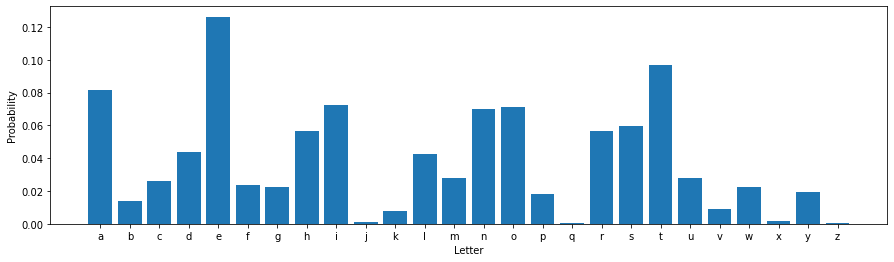

In [ ]:
# compute entropy of letters

# convert frequency to probability
letterprob = lettercounts / sum(lettercounts)

# confirm: probabilities must sum to 1
print(sum(letterprob))

# use the same bar plot as above
fig,ax = plt.subplots(1,figsize=(15,4))
ax.bar(range(len(letters)),letterprob)
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)
ax.set_xlabel('Letter')
ax.set_ylabel('Probability')
fig;

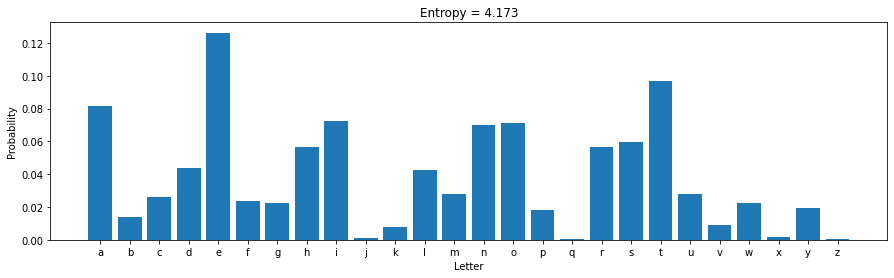

In [ ]:
entropy = - sum(letterprob * np.log2(letterprob + np.finfo(float).eps))

ax.set_title('Entropy = %.3f'%entropy)
fig

In [ ]:
# now for conditional entropy

numLetters = len(letters)

# initialize matrix
probmat = np.zeros((numLetters,numLetters))

# loop through letters and populate the probmat matrix with sequence counts
for i in range(len(text)-1):
  currlet = text[i]
  nextlet = text[i+1]
  # consider only if this and following letter are actual letters (ignore punctuation)
  if currlet in letters and nextlet in letters:    
    probmat[letters.index(currlet),letters.index(nextlet)] += 1

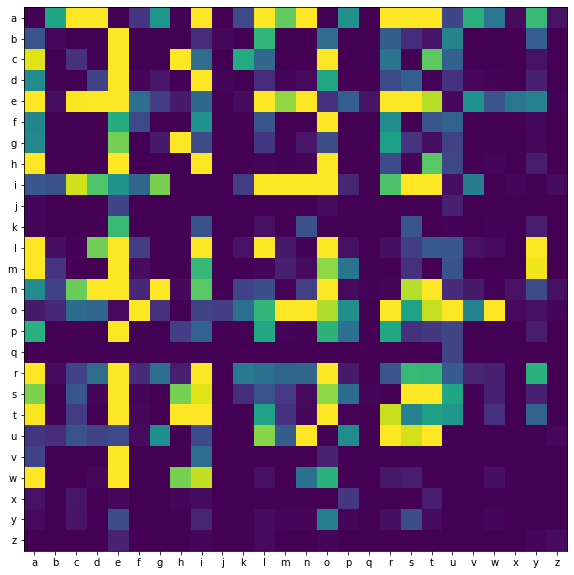

In [ ]:
# show the matrix!

# make sure it has correct x- and y-axis ticks and labels

fig,ax = plt.subplots(1,figsize=(10,10))
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)
ax.set_yticks(range(len(letters)))
ax.set_yticklabels(letters)
ax.imshow(probmat,vmax=500)
plt.show()

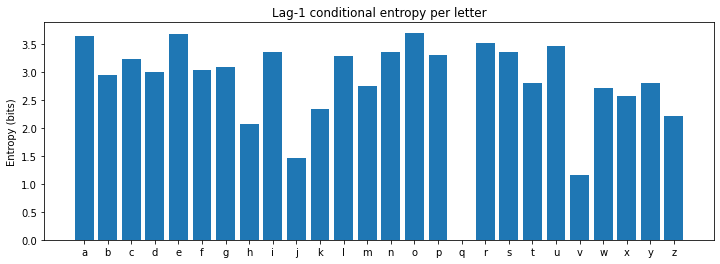

In [ ]:
# now compute conditional entropy
condentr = np.zeros(numLetters)

for i in range(numLetters):
  probs = probmat[i,:]
  probs = probs / sum(probs)
  condentr[i] = -sum( probs*np.log2(probs + np.finfo(float).eps))

fig,ax = plt.subplots(1,figsize=(12,4))
ax.bar(range(numLetters),condentr)
ax.set_xticks(range(numLetters))
ax.set_xticklabels(letters)
ax.set_ylabel('Entropy (bits)')
ax.set_title('Lag-1 conditional entropy per letter')
plt.show()

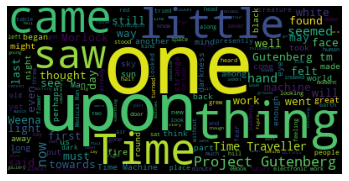

In [ ]:
# bonus: word cloud
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()